In [ ]:
import matplotlib.pyplot as plt
import numpy as np


dim = [4, 8, 16, 32, 64, 128]
stretch_move_result = [118.8, 213.2, 387.1, 808.4, 1401.1, 3021.3]
dim_HMC = [4, 8, 16, 32, 64]
HMC_result = [20.6, 32.6, 62.4, 169.1, 1466.7]

dim_larger = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
HWM_result = [3.46, 3.54, 4.05, 3.84, 4.5, 5.19, 7.05, 9.90, 12.83] # no subsampled





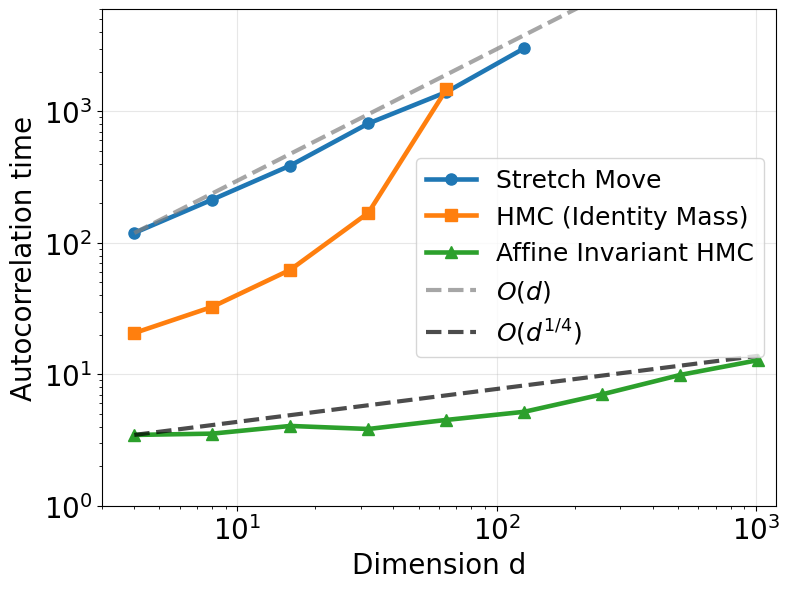

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data
dim = [4, 8, 16, 32, 64, 128]
stretch_move_result = [118.8, 213.2, 387.1, 808.4, 1401.1, 3021.3]

dim_HMC = [4, 8, 16, 32, 64]
HMC_result = [20.6, 32.6, 62.4, 169.1, 1466.7]

dim_larger = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
HWM_result = [3.46, 3.54, 4.05, 3.84, 4.5, 5.19, 7.05, 9.90, 12.83]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the three results with different markers
plt.loglog(dim, stretch_move_result, 'o-', label='Stretch Move', linewidth=3.3, markersize=8)
plt.loglog(dim_HMC, HMC_result, 's-', label='HMC (Identity Mass)', linewidth=3.3, markersize=8)
plt.loglog(dim_larger, HWM_result, '^-', label='Affine Invariant HMC', linewidth=3.3, markersize=8)

# Create theoretical scaling lines
# For O(d) line - scale it to be close to stretch move data
d_theory = np.logspace(np.log10(4), np.log10(1024), 100)
stretch_move_scale = stretch_move_result[0] / dim[0]  # Scale factor from first data point
O_d_line = stretch_move_scale * d_theory

# For O(d^{1/4}) line - scale it to be close to HWM data
HWM_scale = HWM_result[0] / (dim_larger[0]**(1/4))  # Scale factor from first data point
O_d_quarter_line = HWM_scale * (d_theory**(1/4))

# Plot theoretical lines in gray dashed
plt.loglog(d_theory, O_d_line, '--', color='gray', linewidth=3, alpha=0.7, label=r'$O(d)$')
plt.loglog(d_theory, O_d_quarter_line, '--', color='black', linewidth=3, alpha=0.7, label=r'$O(d^{1/4})$')

# Customize the plot
plt.xlabel('Dimension d', fontsize=20)
plt.ylabel('Autocorrelation time', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.grid(True, alpha=0.3)
plt.legend(fontsize=18)

# Set axis limits for better visualization
plt.xlim(3, 1200)
plt.ylim(1, 6000)

plt.tight_layout()
# plt.show()

plt.tight_layout()
plt.savefig(f"stretch-HMC-HMW-scaling.pdf", dpi=300)